In [195]:
import pandas as pd
from sklearn.linear_model import *
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import *
import matplotlib.pyplot as plt
from sklearn.neighbors import * 
from sklearn.neural_network import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.ensemble import *
from sklearn.datasets import *
from sklearn.model_selection import train_test_split

In [150]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")

In [151]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [153]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [154]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [155]:
y.shape, X.shape

((768,), (768, 8))

In [156]:
logistic = LogisticRegression()

In [157]:
logistic.fit(X, y)

c:\Users\binan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [158]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.17252342e-01  3.35999295e-02 -1.40873538e-02 -1.27044937e-03
 -1.24032635e-03  7.72022437e-02  1.41904200e+00  1.00352835e-02]


In [159]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.11725234182833266
Glucose 0.03359992949701687
BloodPressure -0.014087353766198364
SkinThickness -0.0012704493706294675
Insulin -0.0012403263477329845
BMI 0.07720224366674312
DiabetesPedigreeFunction 1.419042000962668
Age 0.010035283478542241


In [160]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-7.70292103]


In [161]:
y_pred = logistic.predict(X)

In [162]:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [163]:
metrics.confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]], dtype=int64)

<Axes: >

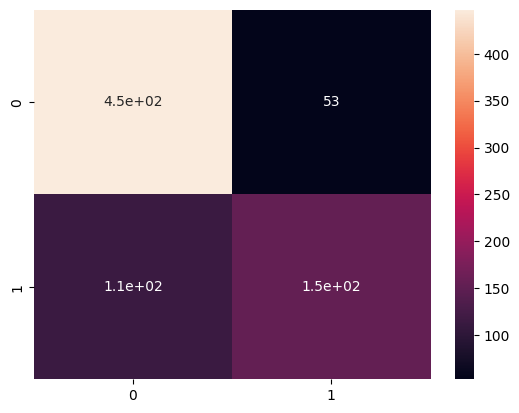

In [164]:
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [165]:
logistic.score(X, y)

0.7825520833333334

In [166]:
metrics.accuracy_score(y, y_pred)

0.7825520833333334

In [167]:
poly = PolynomialFeatures(2)

In [168]:
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

In [169]:
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

c:\Users\binan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Задания для самостоятельного выполнения**

1. Изучите документацию sklearn, посвященную классу LogisticRegression. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [170]:
polynomial.classes_

array([0, 1], dtype=int64)

In [171]:
polynomial.coef_

array([[-6.40198424e-06, -5.34111939e-06, -3.96759223e-04,
        -2.02345665e-04, -6.19215615e-05, -2.11769955e-04,
        -9.63855617e-05, -8.35598904e-07, -9.91072358e-05,
         6.37330104e-05,  4.79271687e-04,  4.85679009e-04,
         1.14395243e-04,  1.32144404e-04,  1.60536000e-04,
         6.86743652e-06,  9.17303426e-05,  1.26392938e-04,
         5.06987940e-05,  2.13527362e-06, -4.38470173e-05,
         1.17964732e-04,  6.07878609e-05, -4.89531480e-04,
        -7.40207999e-04, -1.98605853e-04,  5.33631695e-05,
         1.94149099e-04,  4.84452997e-05,  9.74308194e-04,
         2.74209226e-05,  2.19690842e-04, -6.38596336e-05,
         2.97540061e-05,  1.19854176e-04,  3.50161419e-06,
        -2.97281529e-04, -8.19890446e-05,  1.24066928e-04,
         9.68595788e-05,  2.47100382e-05,  6.98663832e-05,
         5.56714123e-07,  1.86327685e-05, -3.63917928e-04]])

In [172]:
polynomial.intercept_

array([-6.40198447e-06])

In [173]:
polynomial.n_features_in_ # Number of features seen during fit

45

In [174]:
polynomial.n_iter_ # Actual number of iterations for all classes. If binary or multinomial, it returns only 1 element. For liblinear solver, only the maximum number of iteration across all classes is given.

array([100])

In [175]:
polynomial.score(poly, y)

0.7239583333333334

In [176]:
logistic.score(X, y)

0.7825520833333334

2. Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности

Метод опорных векторов

In [177]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

Accuracy: 0.77734375


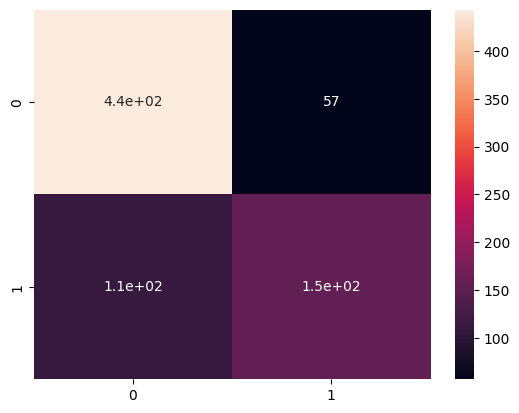

Accuracy: 0.7760416666666666


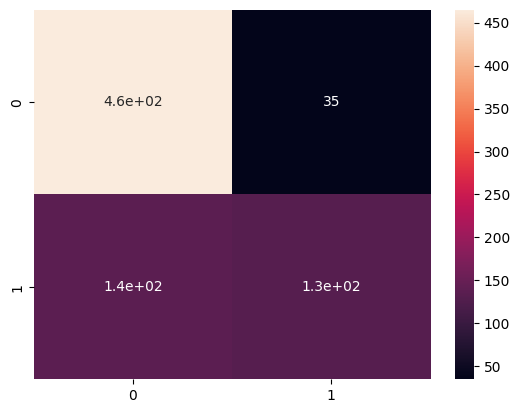

Accuracy: 0.7682291666666666


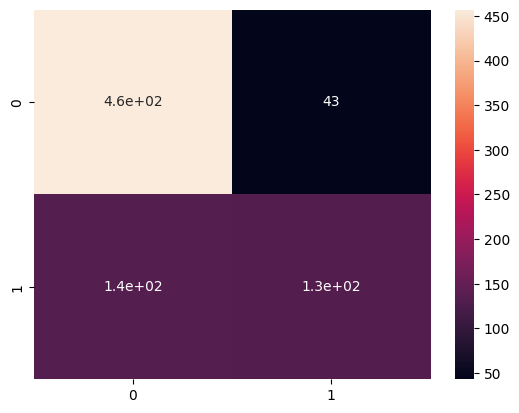

Accuracy: 0.4947916666666667


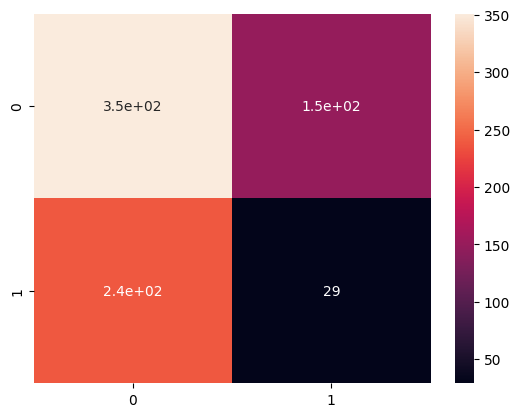

In [178]:
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(f'Accuracy: {clf.score(X, y)}')
    plt.figure()
    sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)
    plt.show()

Метод ближайших соседей

Accuracy: 0.8033854166666666


<Axes: >

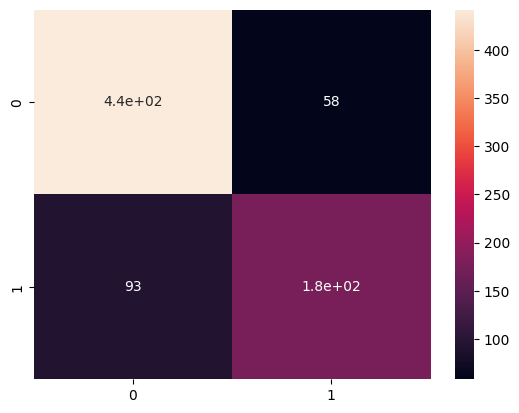

In [179]:
KNeighClf = KNeighborsClassifier()
KNeighClf.fit(X, y)

y_pred = KNeighClf.predict(X)
print(f'Accuracy: {KNeighClf.score(X, y)}')
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

Многослойный перцептрон

Accuracy: 0.7565104166666666


<Axes: >

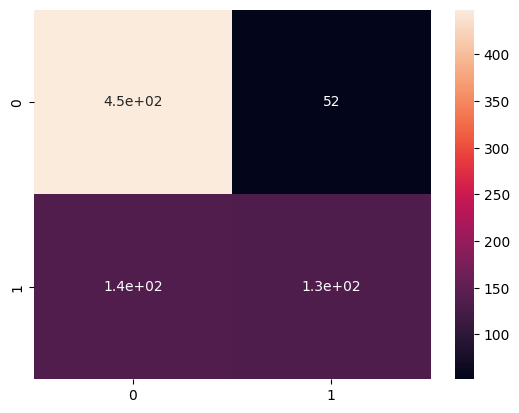

In [180]:
MLPClf = MLPClassifier()
MLPClf.fit(X, y)

y_pred = MLPClf.predict(X)
print(f'Accuracy: {MLPClf.score(X, y)}')
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

Дерево решений

Accuracy: 1.0


<Axes: >

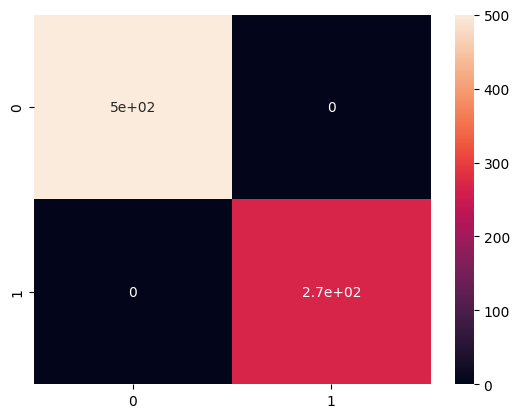

In [181]:
TreeClf = DecisionTreeClassifier()
TreeClf.fit(X, y)

y_pred = TreeClf.predict(X)
print(f'Accuracy: {TreeClf.score(X, y)}')
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

Наивный байесовский классификатор

Accuracy: 0.7630208333333334


<Axes: >

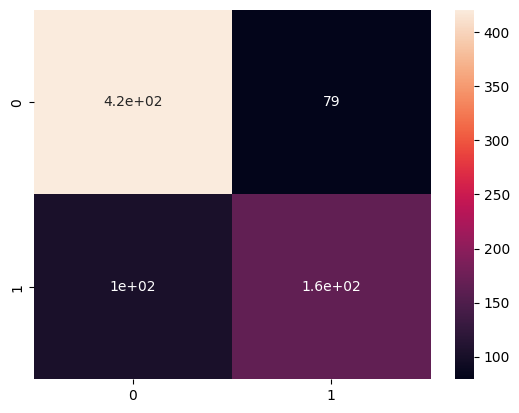

In [182]:
GaussianClf = GaussianNB()
GaussianClf.fit(X, y)

y_pred = GaussianClf.predict(X)
print(f'Accuracy: {GaussianClf.score(X, y)}')
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

Пассивно-агрессивный классификатор

Accuracy: 0.6484375


<Axes: >

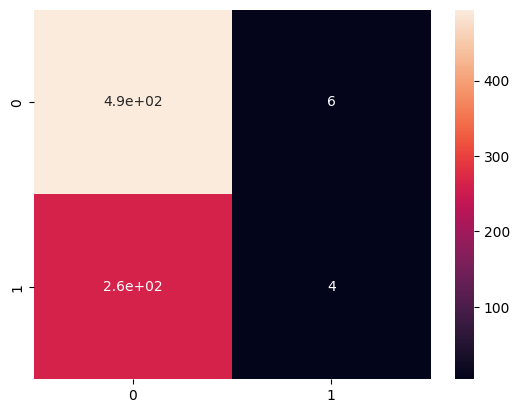

In [183]:
PassiveAggClf = PassiveAggressiveClassifier()
PassiveAggClf.fit(X, y)

y_pred = PassiveAggClf.predict(X)
print(f'Accuracy: {PassiveAggClf.score(X, y)}')
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

Гребневый классификатор

Accuracy: 0.7825520833333334


<Axes: >

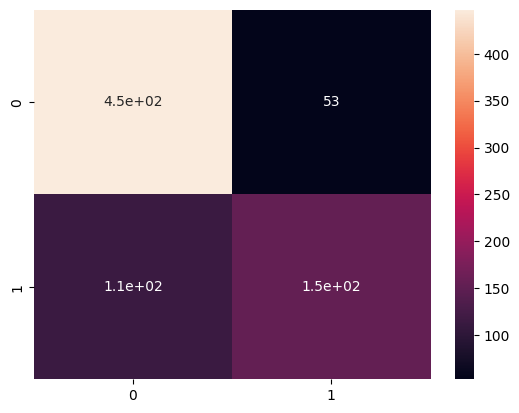

In [184]:
RidgeClf = RidgeClassifier()
RidgeClf.fit(X, y)

y_pred = RidgeClf.predict(X)
print(f'Accuracy: {RidgeClf.score(X, y)}')
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

Случайный лес

Accuracy: 1.0


<Axes: >

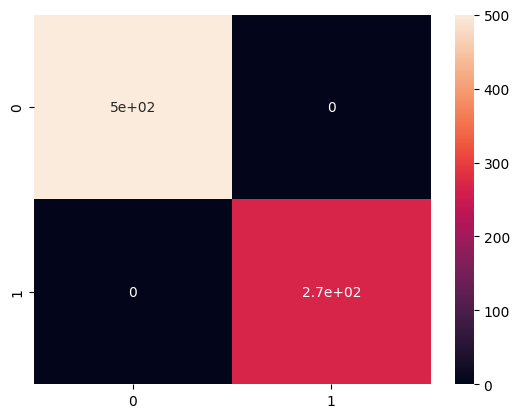

In [185]:
RandomForestClf = RandomForestClassifier()
RandomForestClf.fit(X, y)

y_pred = RandomForestClf.predict(X)
print(f'Accuracy: {RandomForestClf.score(X, y)}')
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

Беггинг

Accuracy: 0.9908854166666666


<Axes: >

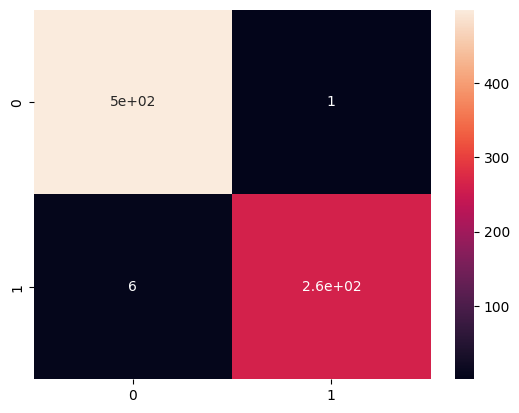

In [186]:
BaggingClf = BaggingClassifier()
BaggingClf.fit(X, y)

y_pred = BaggingClf.predict(X)
print(f'Accuracy: {BaggingClf.score(X, y)}')
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.


In [187]:
def Func():
    models = [SVC(kernel='linear'), SVC(kernel='poly'), SVC(kernel='rbf'), SVC(kernel='sigmoid'), MLPClassifier(), DecisionTreeClassifier(), GaussianNB(), PassiveAggressiveClassifier(), RidgeClassifier(), RandomForestClassifier(), BaggingClassifier()]

    for model in models:
        model.fit(X, y)
        print(f'Model: {type(model).__name__}')
        print(f'Accuracy: {model.score(X, y)}')

In [188]:
Func()

Model: SVC
Accuracy: 0.77734375
Model: SVC
Accuracy: 0.7760416666666666
Model: SVC
Accuracy: 0.7682291666666666
Model: SVC
Accuracy: 0.4947916666666667
Model: MLPClassifier
Accuracy: 0.7395833333333334
Model: DecisionTreeClassifier
Accuracy: 1.0
Model: GaussianNB
Accuracy: 0.7630208333333334
Model: PassiveAggressiveClassifier
Accuracy: 0.4348958333333333
Model: RidgeClassifier
Accuracy: 0.7825520833333334
Model: RandomForestClassifier
Accuracy: 1.0
Model: BaggingClassifier
Accuracy: 0.9739583333333334


4. Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [189]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [190]:
X = pd.DataFrame(data.data)
X.columns = data.feature_names
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [191]:
y = pd.DataFrame(data.target)
y.columns = ['Iris']
y

,Iris
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [192]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [193]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.25)

In [197]:
def GigaFunc(X, y):
    models = [SVC(kernel='linear'), SVC(kernel='poly'), SVC(kernel='rbf'), SVC(kernel='sigmoid'), MLPClassifier(), DecisionTreeClassifier(), GaussianNB(), PassiveAggressiveClassifier(), RidgeClassifier(), RandomForestClassifier(), BaggingClassifier()]

    for model in models:
        model.fit(X, y)
        print(f'Model: {type(model).__name__}')
        print(f'Accuracy: {model.score(X, y)}')
        

In [198]:
GigaFunc(X, y)

c:\Users\binan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\binan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\binan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\binan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataC

Model: SVC
Accuracy: 0.9933333333333333
Model: SVC
Accuracy: 0.9733333333333334
Model: SVC
Accuracy: 0.9733333333333334
Model: SVC
Accuracy: 0.07333333333333333
Model: MLPClassifier
Accuracy: 0.98
Model: DecisionTreeClassifier
Accuracy: 1.0
Model: GaussianNB
Accuracy: 0.96
Model: PassiveAggressiveClassifier
Accuracy: 0.96
Model: RidgeClassifier
Accuracy: 0.8533333333333334
Model: RandomForestClassifier
Accuracy: 1.0
Model: BaggingClassifier
Accuracy: 0.9933333333333333
